# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- *Does the Smartcab move at all during the simulation?*  
No, it does not move in one Trial.  

- *What kind of rewards is the driving agent receiving?*  
If the light is green, agent should move and get rewards for moving. Also If the light is red, agent should not move and get rewards for not moving.  

- *How does the light changing color affect the rewards?*  
Yes, it affect to the rewards, agent should take the action by light color.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*  
 1. epsilon is use for take the action randomly not to drop out local minimum.
 1. alpha is the learning rate to reduce the effect of update to avoid convergence.
 1. tolerance is the epsilon limit for minimum value to check if start the testing.  
 
 And here is the function explainment of my first impression.  
 1. createQ is called in the first to get Q value what to choose in action from state.
 1. get_maxQ function is called in the next to get max Q-valued action from all Q value.
 1. choose_action function is called which action to take for the this time step based on  the state, and returns a action.
 1. update function is called to update the emvironment informations for the next time step and get reward of previous action.
 1. learn function is called to update the Q-function.
 
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
 1. step function is called to update the information in each time step during the traial.  
 1. act function is to get the rewords from environment, it consider the action is legal inside of the function.  
 1. sense function gives agent the information around, to plan the action.  
 1. get_deadline function gives agent the deadline.

- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*  
 - render_text function only provides text base simulation for trial or development phase.  
 - render function provides the GUI render display for production phase.

- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*  
East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


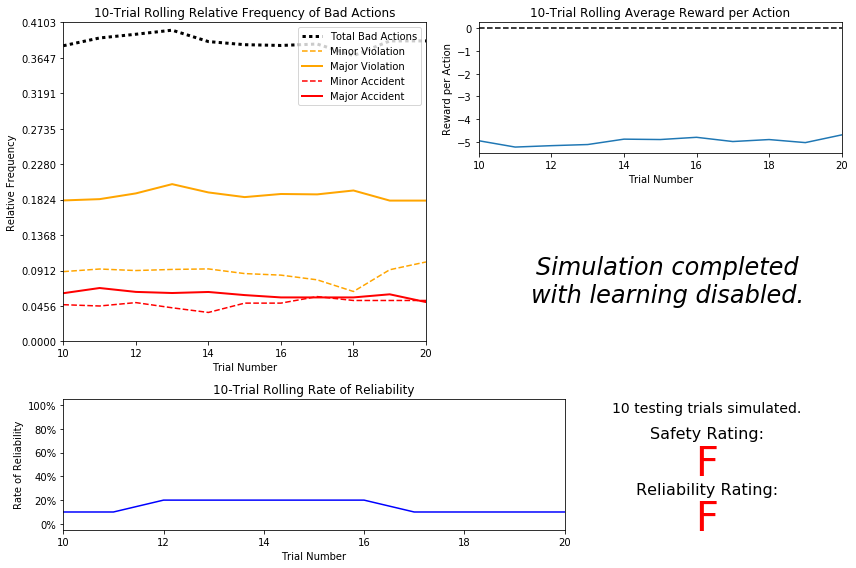

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
 - Bad dicisions are taken by my novice agent at about 40%. It is in the graph of '10-Trial Rolling Relative Frequency of Bad Actions.'
 - The number of cause accidents is about 6%. It is also in the same graph.

- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
 Yes, because the rate of reliabilty is not increased, and also in the real world the drivers go with the random actions, it happens so many accidents.

- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
 If you keep the traffic rules you can earn rewards. For example, red is stopped, green is advancing, and so on. Since the rule is not taken into consideration this time, the value of the reward is low on average, it is minus in the '10-Trial Rolling Average Reward per Action'. This is because it is punished.
 I will also refer to what kind of rewards can be obtained under what circumstances. In this simulator the agent must stop if light is red. You can get rewards while you are stopped, but if you move in the direction of light you will be deducted. On the contrary, if the light is green, the agent has to proceed. And you can earn positive rewards. Although it is green, it will be deducted that it will not move. Finally a little complicated is when there is a car around in green condition. In this case, it is necessary to match with circumstances. Specifically, in the case of collision with a car, it will be greatly reduced, so you should avoid hitting movements. On the contrary, if you do not hit, you can get a reward by going in the direction of travel as it is green.

- *As the number of trials increases, does the outcome of results change significantly?*
 No. Because we are not implementing to learn the agent.

- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*
 I think there are no safe and reliable. Because, according to the above Grade table, F causes an accident and also ignores the signal. Moreover, it is not in time for customer's aim time of 60% or more.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

- *Which features available to the agent are most relevant for learning both **safety** and **efficiency**? *
 - 'waypoint' is for both safety and efficiency. What kind of route to select will affect the choice of the shortest route, excluding the location of the car and the influence of the signal already. Then it is necessary to select the optimum route taking into consideration the state of the signal and the presence of surrounding cars. So this feature will have an impact on either.

 - 'light' is for both safety and efficiency. Because ignoring light can impair safety and you can select an efficient route by looking at the next ligt.

 - 'oncoming' is use for both safety and efficiency. I think both cars will affect whether or not the car is coming. The reason is that if you have a car, you need to consider the route and then choose the most appropriate route. Of course you should not bump into a car.
 
 - For the same reason as 'oncoming' 'left' and 'right' also affect both safety and efficiency.

- *Why are these features appropriate for modeling the *Smartcab* in the environment?* 
 This is because the information is necessary for smatcab to determine the route to the destination. For example, we will drive the car to the destination while confirming the location of the destination, the signal situation, other traffic information of the car. Just like that, the autonomous driving system also needs to decide the plan while checking the circumstances. I think that the necessary information for these is these features.

- *If you did not choose some features, why are those features* not *appropriate?*
  - 'deadline' may affect only efficiency. The reason why it does not contribute to safety is that this is only an indicator of the deadline, so it is unlikely that it will improve safety. Rather, emphasis on efficiency leads to concerns that safety will be impaired.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

 - 'waypoint' can be obtained from direction of actions. Then there are 3 of 'forward', 'right', 'left'.
 - 'Light' has green and red modes. However, this is the case when considering only the light in front of you. To make further predictions it is necessary to multiply by that number. This time we will only set the light in front of you, 2.
 - 'left', 'right' and 'oncoming' are 4 choices, for example, the right indicates that the car on the right is moving forward, where you are going to the left and right, and None means there is no car.  
As a result, the number of states obtained from the examination so far is 3 x 2 x 4 x 4 x 4 = 384. If you set the average deadline to 35, 175 steps can be done with 5 times that for a single trial. Since the training phase is 20 times, it becomes 3500 steps which is 20 times that when matching the number of steps of all training phases. Since it is about 1/10 of the number of states of all steps, there is a possibility that the learning itself is exhausted, but since it is not overflowing, I decide to proceed with this.

 This is not directly related to this experiment, but let's see what happens if we include deadline, for example.  
 - 'deadline' is 5 times the distance by default in this program. And since the distance is calculated by the Manhattan distance, the maximum value is 14 if the grid size is (8, 6). So 70 patterns that multiplied 5 to 14 patterns is the maximum number.  
 
 Considering the total combination from the above, the number of states is 3 x 2 x 4 x 4 x 4 x 70 = 26880. Compared with this value, 3500 is a lot, so there is no progression of learning.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

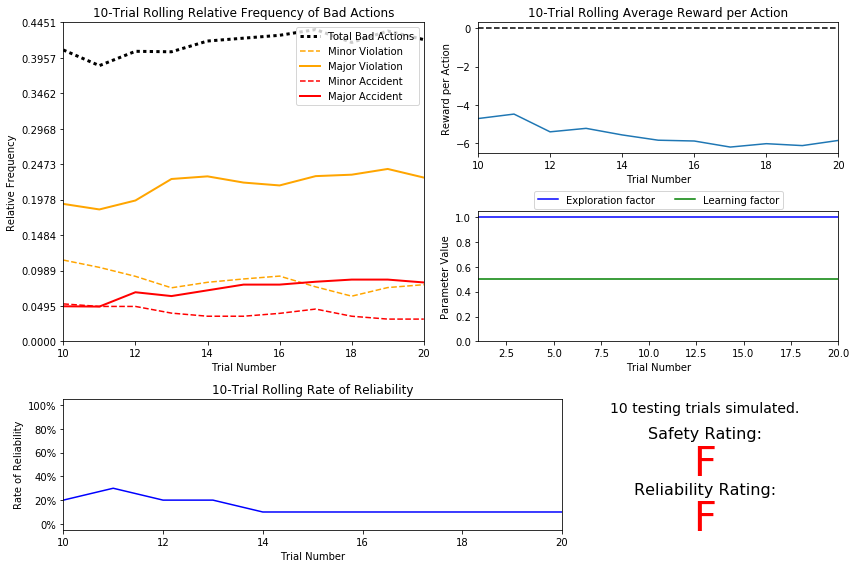

In [4]:
vs.plot_trials('sim_set-states.csv')

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

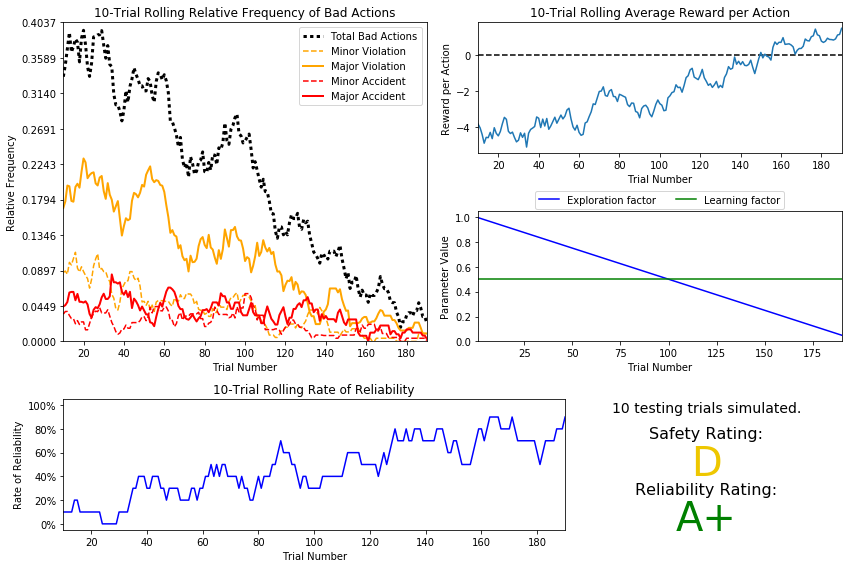

In [8]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*  
 Safety and reliability were somewhat improved from the first result when ranked. Especially Reliability is the highest rank A +. However, since safety is still ranked D, I think there is room for learning and that there is room for thinking about more effective learning methods.

- *Approximately how many training trials did the driving agent require before testing?  
 The learning of this time was a total of 35000 steps. This is the average of 35 times of training for each trial, considering the margin five times the deadline time. There is a margin of about 100 times the number of states examined in Question 5. I can not say that's enough, but I think that learning will go at least in a good direction.
 For ε, set the attenuation of each learning to 0.005. Therefore, ε decreased to 0.0 in 200 tests. First of all, learning was advanced with ε set to 0.05, but since the result is F / F, we recommend increasing the number of learning. For example, looking at the graph above, many serious violations remain. Furthermore, by decreasing the attenuation of ε and increasing learning opportunities, the results can be improved.

- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*  
 Yes, from the graph it seems like decaying by my implementation. It is from 1.0 to 0.0, step = - 0.005.

- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*  
 Increasing learning opportunities has reduced the number of bad acts and rewards are increasing. This is a good trend. But Safety is D. This indicates that Violation and accident are occurring. For example, if you look closely at the graph, the degree of reduction of major violations is not very good. A serious violation is to ignore the signal. To know more about the signal, more data may be required.

- *How does the safety and reliability rating compare to the initial driving agent?*  
 The ratings have improved. I think that the agent could learn that reaching to the destination leads to reward. But safety still has room for improvement. However, as you see the learning results, it is definitely getting better, so if you further increase your learning opportunities, it may become aiming for you.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

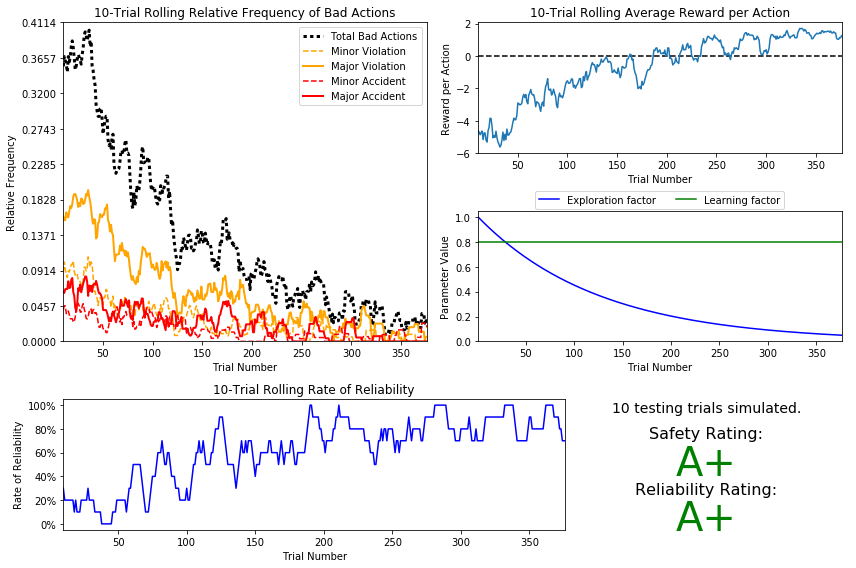

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- *What decaying function was used for epsilon (the exploration factor)?*  
 I used epsilon = exp(-a x t); a = 0.008, t = timestep

- *Approximately how many training trials were needed for your agent before begining testing?*  
 About 400 trials to get good result.

- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*  
 I made alpha = 0.8. There was concern about overfitting, but because it increased the number of training times, it seemed that there was no problem. I thought that it seems to be a bit too high, so I thought about trying to lower it if bad results come out, but I will set this value as the result comes out.

- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*  
 Of course, detailed numerical values are improved. Please confirm it with the graph above. Here is the total rank of each.  

|items|Default|Advanced|
|:---|---:|---:|
|Safety|D|A+|
|Reliability|A+|A+|

- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*  
 In most cases I think so. However, since mistakes are not 0, it is not so if we could learn perfectly. In order to prevent this, I think that it is necessary to take a logic-based approach for avoiding anomalies rather than a probabilistic approach.

- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*  
 Yes, of course. Because it was able to finish all ranks perfectly.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Here are some rules that smartcab has to learn
 - Do not break the rule of the signal
 - Things not hitting a car
 
Of course it is also important to protect your credit, but I think that they are not reflected in the policy. This is because the above rules are included in the factors that lower reward, so you should be satisfied with customer satisfaction after being.

 - Do not break the rule of the signal
 I chech policy of that from the text, please look at below

('forward', ('red', None, None, None)) = forward : -9.96, right : 0.41, None : 2.35, left : -10.49  
The Q-value of going forward if the signal is in the red is very low. In other words, you can see from this that you got a big penalty if going ahead. Also in this case, I think that it is a correct answer not to do anything, and None's Q-value is the highest so I think that it is learning correctly.
 
('left', ('red', None, None, 'right')) = forward : -8.76, right : 0.29, None : 1.22, left : -10.41  
The car is coming from the front, but the car turns to the right. In other words, as I headed in the same direction as my car, there is a possibility of collision. So I think that the value of left is the lowest. Also, as it is obviously a red light, going straight is a bad behavior, but the Q value is low. On the contrary, because I want to go to the left, it is correct that I do not do anything, so its Q value is the highest and it is correct. I do not know why I want to go to the right. Perhaps did he get rewarded by going to the right during random learning? However, I think that learning has been done because choices other than None and Right are low.
 
('right', ('green', None, 'forward', None)) = forward : 0.08, right : 1.39, None : -4.77, left : 0.49  
On the contrary, I will look at the case of green. Our car wants to go to the right. There is a car going straight ahead on the right. So you can go to the right in this case. Since it is green, it will be deducted if you do not do anything, so it is correct that the Q value of None is low. Also, since it is right to go, the right Q value is the highest evidence that you can learn properly.

In this way we found that learning was done correctly in many cases. However, we did not have a perfect choice for everything, but we found that we were able to choose the best choice at the current level. As this trend continues, I think that if we increase more learning while avoiding over-learning in the future, we can make a more accurate prediction.

 - Things not hitting a car
 
('left', ('green', 'forward', None, 'forward')) = forward : 0.99, right : 1.30, None : -4.38, left : -15.52  
 The signal is green. We want to go to the left. However, since a straight traveling car is coming from the left, it is expected that if you go to the left as it is, you will hit it. So it is a good trend that the Q value on the left in this case is low. Also, since the signal is green, it is a tough idea because it is deducted if you do not do anything, but going straight to the left is the right choice.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

First there is sensor placement. The sensor can only obtain information on the surrounding positions by one's own mass. In order to foresee the fact that cars actually hit, information on the other side is necessary. So, there is a problem that it can not be covered by the detection range of the current sensor. For example, if you can sense the position up to the second square, you can predict whether another car will come to the square you are going to go next, so we think you can complete the task more safely.

Regarding the other environment, it is related to the goal and the position of the car. The current reward is decided based on the traffic rules and the goal and car position can be determined at random, but the car can not figure out the direction the goal is in. Therefore, there is no way to check what kind of results will result in one choice in the future. So, as in the previous Q8 example, you will turn around to the right by giving priority to the traffic rules (to be able to come closer if you go straight ahead) where you should turn to the left. So, if you can learn a policy that gives the information like distance to the destination, for example, which will lead to future rewards in the same way and reduces that value quickly, perhaps learning progresses without setting gamma to 0 A good environment may be created.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.